# Decision Tree Classification – Heart Disease Dataset

This notebook applies a Decision Tree Classifier to the **heart_disease.xlsx** dataset.

**Objective:**
- Perform EDA
- Train and evaluate a Decision Tree model
- Tune hyperparameters
- Interpret results


## 1. Data Preparation

In [2]:
import pandas as pd
import numpy as np

# Load dataset from the 'Heart_disease' sheet
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.shape

(908, 13)

In [4]:
xls = pd.ExcelFile('heart_disease.xlsx')
print(xls.sheet_names)

['Description', 'Heart_disease']


## 2. Exploratory Data Analysis (EDA)

In [5]:
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


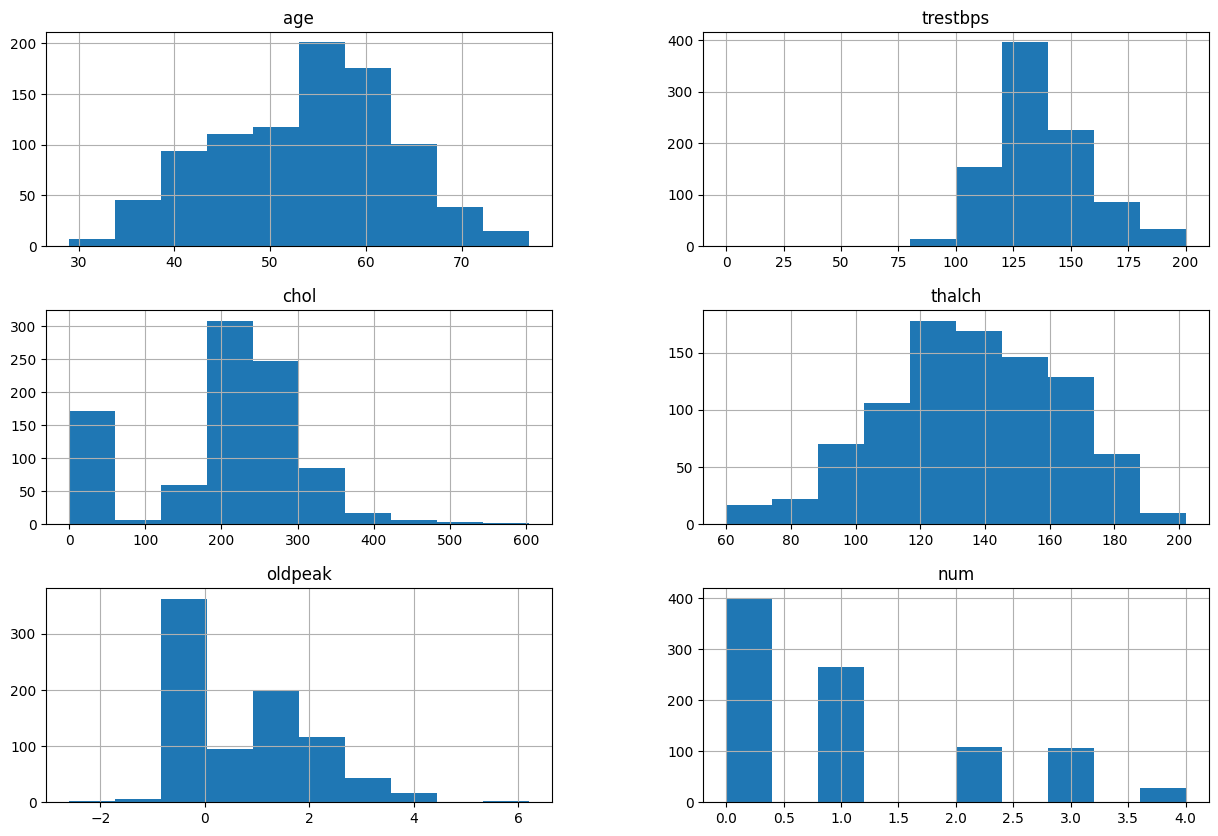

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15,10))
plt.show()

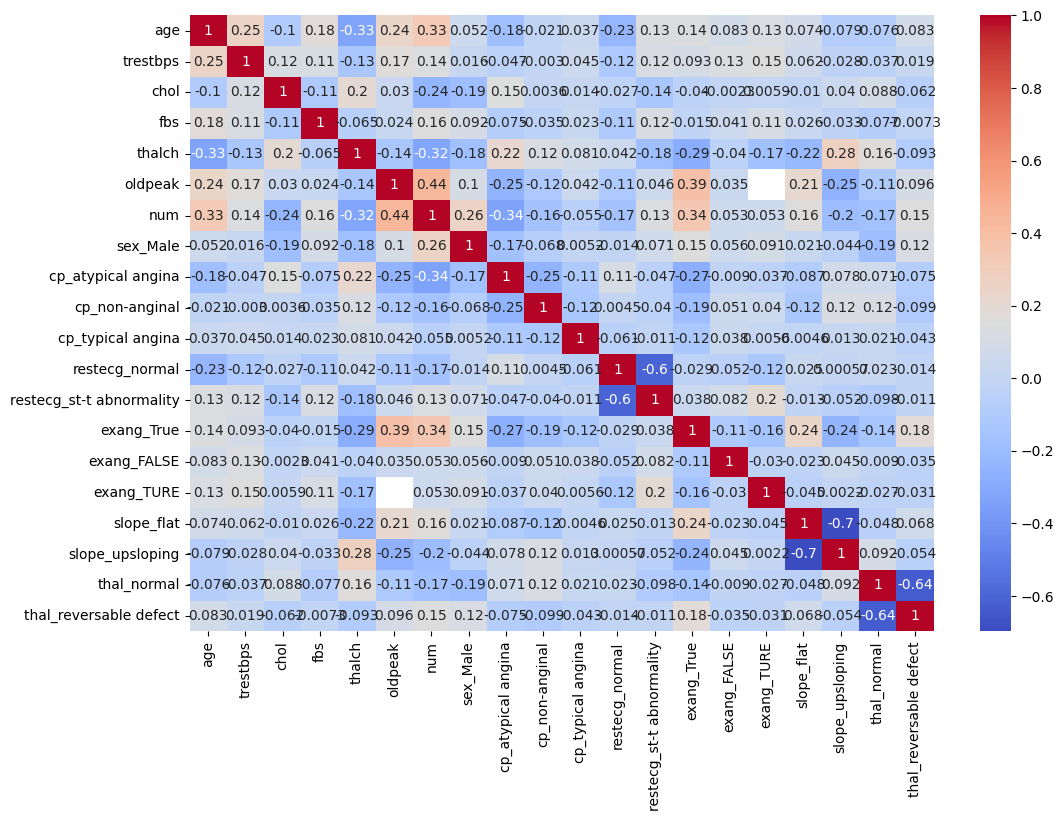

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df is defined (assuming it's loaded from a previous cell or in kernel state)
# If df is not in kernel, this would also need to be loaded.
# Based on the kernel state, df is available.

# Define df_encoded as per cell 9429aa6d if it wasn't executed
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Feature Engineering

In [9]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

In [10]:
X

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,True,False,False,False,True,False,False,False,False,False,True,True,False
904,62,166,170,False,120,3.0,True,False,False,False,False,True,True,False,False,True,False,True,False
905,56,170,0,False,123,2.5,True,False,True,False,False,False,True,False,False,False,False,False,False
906,56,144,208,True,105,NaN,True,False,True,False,False,True,False,False,True,False,False,False,True


In [11]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


## 4. Decision Tree Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.510989010989011
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        89
           1       0.35      0.38      0.36        48
           2       0.29      0.23      0.26        22
           3       0.29      0.29      0.29        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.50      0.51      0.50       182



## 5. Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print('Best Parameters:', grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


## 6. Model Evaluation & Tree Visualization

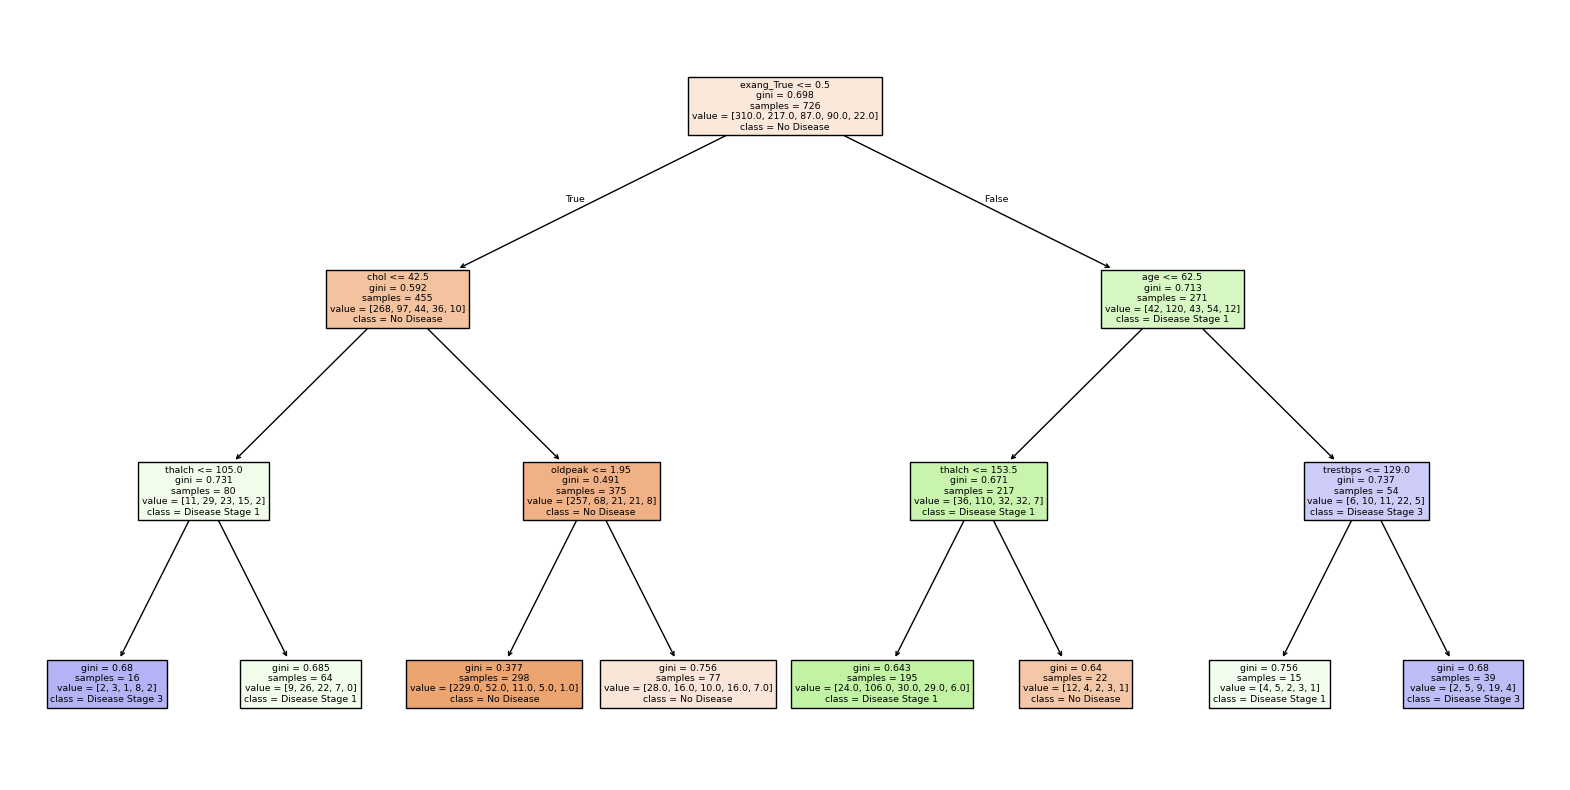

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', 'Disease Stage 1', 'Disease Stage 2', 'Disease Stage 3', 'Disease Stage 4'], filled=True)
plt.show()

## Interview Questions

**1. Common Decision Tree Hyperparameters:**
- `max_depth`: controls tree complexity
- `min_samples_split`: prevents overfitting
- `criterion`: metric to measure split quality

**2. Label Encoding vs One-Hot Encoding:**
- Label Encoding assigns numeric values to categories
- One-Hot Encoding creates binary columns for each category
